In [1]:

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# Select a dataset

We'll work with a dataset of 150 different flowers, or 50 each from three different species of iris (*Iris setosa*, *Iris versicolor*, and *Iris virginica*).

![tut4_iris](https://i.imgur.com/RcxYYBA.png)

# Load and examine the data

Each row in the dataset corresponds to a different flower.  There are four measurements: the sepal length and width, along with the petal length and width.  We also keep track of the corresponding species. 

In [2]:
iris_filepath = "../input/iris.csv"

iris_data = pd.read_csv(iris_filepath, index_col="Id")

iris_data

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


# Histograms

Say we would like to create a **histogram** to see how petal length varies in iris flowers.  We can do this with the `sns.distplot` command.  

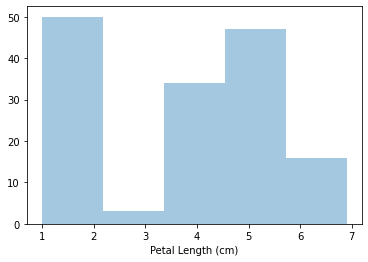

In [3]:
sns.distplot(a=iris_data["Petal Length (cm)"], kde=False)

We customize the behavior of the command with two additional pieces of informmation:
* `a=` chooses the column we'd like to plot (in this case, we chose `'Petal Lenght (cm)'`).
* `kde=False` is something we'll always provide when creating a histogram, as leaving it out will create a slight different plot.

# Density plots
The next type of plot is a **kernel density estimate (KDE)** plot. In case you're not familiar with KDE plots, you can think of it as a smoothed histogram.

To make a KDE plot, we use the sns.kdeplot command. Setting shade=True colors the area below the curse (and **data**= has identical functionlity as when we made the histogram above).

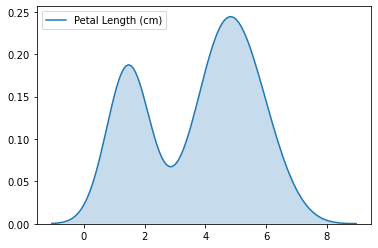

In [4]:
sns.kdeplot(data=iris_data["Petal Length (cm)"], shade=True)

# 2D KDE plots
we're not restricted to a single column when creating a KDE plot. We can create a **two-dimensional (2D) KDE plot** with the `sns.jointplot` command.

In the plot below, the color-coding showns us how likely we are to see different combinations of sepal width and petal lenght, where darker parts of the figure are more likely.

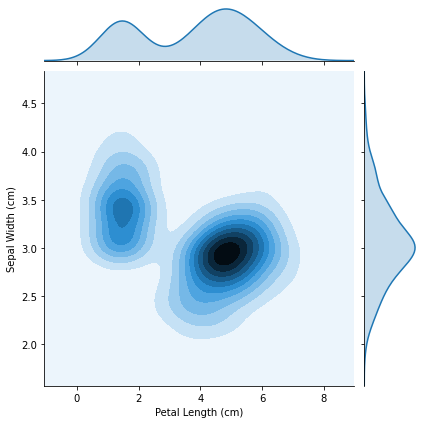

In [23]:
sns.jointplot(x=iris_data["Petal Length (cm)"], y=iris_data["Sepal Width (cm)"], kind="kde")

Note that in addition to the 2D plot in the center,
* The curve at the top of the figure is a KDE plot for the data on the x-axis (in this case, `iris_data["Petal Length (cm)"`), and

* The curve on the right of the figure is a KDE plot for the data on the y-axis (in this case, `iris_data['Sepal Width (cm)'`]).                         

# Color-coded plots
For the next part of the tutorial, we'll create plots to understand differences between the species. To accomplish this, we begin by breaking the dataset into three separate, with one for each species.

In [6]:
iris_set_filepath = "../input/iris_setosa.csv"
iris_ver_filepath = "../input/iris_versicolor.csv"
iris_vir_filepath = "../input/iris_virginica.csv"

iris_set_data = pd.read_csv(iris_set_filepath, index_col="Id")
iris_ver_data = pd.read_csv(iris_ver_filepath, index_col="Id")
iris_vir_data = pd.read_csv(iris_vir_filepath, index_col="Id")

iris_ver_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
51,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4.0,1.3,Iris-versicolor
55,6.5,2.8,4.6,1.5,Iris-versicolor


In the code cell below, we crate a different histogram for each species by using the `sns.displot` command (as above) three times. We use `label=` to set how each histogram will appear in the legend.

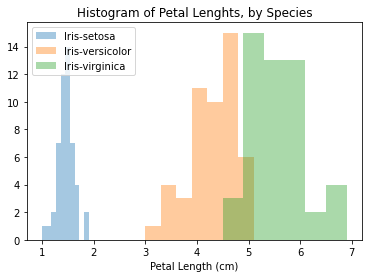

In [7]:
sns.distplot(a=iris_set_data['Petal Length (cm)'], label="Iris-setosa", kde=False)

sns.distplot(a=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", kde=False)

sns.distplot(a=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", kde=False)

plt.title("Histogram of Petal Lenghts, by Species")
plt.legend()

In this case, the legend does not automatically appear on the plot. To force it to show (for any plot type), we can always use `plt.legend()`.

We can also create a KDE plot for each species by using `sns.kdeplot` (as above). Again, `label=` is used to set the values in the legend.

Text(0.5, 1.0, 'Histogram of Petal Lenghts, by Species')

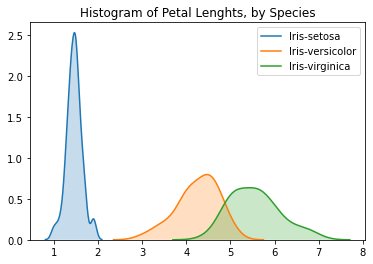

In [8]:
sns.kdeplot(data=iris_set_data['Petal Length (cm)'], label="Iris-setosa", shade=True)

sns.kdeplot(data=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", shade=True)

sns.kdeplot(data=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", shade=True)

plt.title("Histogram of Petal Lenghts, by Species")

One interesting pattern that can be seen in plots is that the plants seem to belong to one of two groups, where Iris versicolor and Iris virginica seem to have similar values for petal length, while Iris setosa belongs in a category all by itself.

In fact, according to this dataset, we might even be able to classify any iris plant as Iris setosa (as opposed to Iris versicolor or Iris virginica) just by looking at the petal length: if the petal length of an iris flower is less than 2 cm, it's most likely to be Iris setosa!

# Histogram And Density Plot Exercise

In this exercise, you will use your new knowledge to propose a solution to a real-world scenario.  To succeed, you will need to import data into Python, answer questions using the data, and generate **histograms** and **density plots** to understand patterns in the data.

## Scenario

You'll work with a real-world dataset containing information collected from microscopic images of breast cancer tumors, similar to the image below.

![ex4_cancer_image](https://i.imgur.com/qUESsJe.png)

Each tumor has been labeled as either [**benign**](https://en.wikipedia.org/wiki/Benign_tumor) (_noncancerous_) or **malignant** (_cancerous_).

To learn more about how this kind of data is used to create intelligent algorithms to classify tumors in medical settings, **watch the short video [at this link](https://www.youtube.com/watch?v=9Mz84cwVmS0)**!



## Setup

Run the next cell to import and configure the Python libraries that you need to complete the exercise.

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.plotting.register_matplotlib_converters()
%matplotlib inline
print("Setup Complete")

Setup Complete


The below given code is feedback system which is only for kaggle

In [10]:
# Set up code checking system
import os
if not os.path.exists("../input/cancer_b.csv"):
    os.symlink("../input/data-for-datavis/cancer_b.csv", "../input/cancer_b.csv")
    os.symlink("../input/data-for-datavis/cancer_m.csv", "../input/cancer_m.csv")
from learntools.core import binder
binder.bind(globals())
from learntools.data_viz_to_coder.ex5 import *
print("Setup Complete")

Setup Complete


## Step 1: Load the data
in this step, you will load two data files.
* Load the data file correspoding to **benign** tumors into a DataFrame called `cancer_b_data`. The corresponding filepath is `cancer_b_filepath`. Use the `"Id"` column to label the rows.
* Load the data file correspoding to **malignant** tumors into a DataFrame called `cancer_m_data`. The corresponding filepath is `cancer_m_filepath`. Use the `"Id"` column to label the rows.

In [11]:
cancer_b_filepath = "../input/cancer_b.csv"
cancer_m_filepath = "../input/cancer_m.csv"

cancer_b_data = pd.read_csv(cancer_b_filepath, index_col="Id")
cancer_m_data = pd.read_csv(cancer_m_filepath, index_col="Id")
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

## Step 2: Review the data
1. Use a Python command tp print the first 5 rows of the data for benign tumors.

In [12]:
cancer_b_data[0:5]

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


2. Use a Python command tp print the first 5 rows of the data for malignant tumors.

In [13]:
cancer_m_data.head()

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In the datasets, each row corresponds to a different image. Each dataset has 31 different columns, corresponding to:
* 1 column (`Diagnosis`) that classifies tumors as either benign (which appers in the dataset as `B`) or malignant (`M`), and
* 30 colums containing different measurments collected from the images.

Use the first 5 rows of the data (for benign and malignant tumors) to answer the questions below.

In [14]:
# In the first five rows of the data for benign tumors, what is the
# largest value for 'Perimeter (mean)'?
max_perim = cancer_b_data[0:5]['Perimeter (mean)'].max()

mean_radius = cancer_m_data.loc[842517]['Radius (mean)']
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

## Step 3: Investigating differences
**Part A**

Use the code cell below to create two histograms that show the distribution in values for `'Area (mean)'` for both benign and malignant tumors. (_To permit easy comparision, create a single figure both histogram in the code cell below._)

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

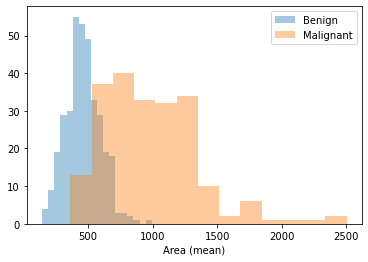

In [50]:
sns.distplot(a=cancer_b_data["Area (mean)"], label="Benign", kde=False)
sns.distplot(a=cancer_m_data["Area (mean)"], label="Malignant",kde=False)
plt.legend()
step_3.a.check()

**Part B**

A reseacher approches you for help with identifying how the `'Area (mean)'` column can be used to understand the difference between benign and malignant tumors. Based on the historgram above,

* Do malignant tumors have higher or lower values for `'Area' (mena)` (relative to benign tumors), on averages?

* Which tumor type seems to have a larger range of potential values?

In [55]:
# Malignant tumors have higher values for 'Area (mean)', on average.
step_3.b.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Malignant tumors have higher values for `'Area (mean)'`, on average. Malignant tumors have a larger range of potential values.

## Step 4: A very useful column
**Part A**

Use the code cell below to create two KDE plot that show the distribution in values for `'Radius (worst)'` for both benign and malignant tumors. (_To permit easy comparsion, crate a single figure containing both kde plots in the code cell below._)

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

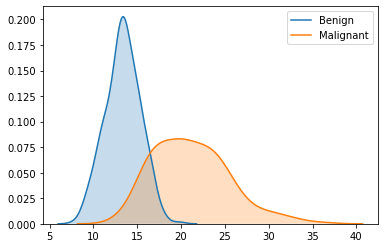

In [66]:
sns.kdeplot(data=cancer_b_data["Radius (worst)"], shade=True, label="Benign")
sns.kdeplot(data=cancer_m_data["Radius (worst)"], shade=True, label="Malignant")
step_4.a.check()

**Path B**

A hosptial has recently started using an algorithm that can diagnose tumors with high accuracy. Given a tumor with a value for `'Radius (worst)'` of 25, do you think the algorithm is more likely to classify the tumor as benign or malignant?

In [90]:
# The algorithm is more likely to classify the tumor as malignant. 
#This is because the curve for malignant tumors is much higher than 
#the curve for benign tumors around a value of 25

for i in round(cancer_m_data["Radius (worst)"]):
    if i == 25:
        print(i)

25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0


212